In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", None)
pd.set_option('display.float_format',lambda x : '%.4f' % x)
pd.options.display.float_format = '{:.4f}'.format
np.set_printoptions(suppress=True) #
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
path ='../data/'
file_name = 'e_commerce.xlsx'

In [52]:
%%time
order_df = pd.read_excel(path+file_name,index_col='id')
order_df.head()

CPU times: user 12.4 s, sys: 23.7 ms, total: 12.4 s
Wall time: 12.4 s


,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,,
1,sys-2018-254118088,user-157213,PR000064,272.5100,272.5100,渠道-0396,APP,2018-02-14 12:20:36,2019-02-28 13:38:41,否
2,sys-2018-263312190,user-191121,PR000583,337.9300,337.9300,渠道-0765,Wech atMP,2018-08-14 09:40:34,2019-01-01 14:47:14,是
3,sys-2018-188208169,user-211918,PR000082,905.6800,891.2300,渠道-0530,We c hatMP,2018-11-02 20:17:25,2019-01-19 20:06:35,否
4,sys-2018-203314910,user-201322,PR000302,786.2700,688.8800,渠道-0530,WEB,2018-11-19 10:36:39,2019-08-07 12:24:35,否
5,sys-2018-283989279,user-120872,PR000290,550.7700,542.5100,渠道-9527,APP,2018-12-26 11:19:16,2019-10-01 07:42:43,否


In [53]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104557 entries, 1 to 104557
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       104557 non-null  object        
 1   userID        104557 non-null  object        
 2   goodsID       104557 non-null  object        
 3   orderAmount   104557 non-null  float64       
 4   payment       104557 non-null  float64       
 5   chanelID      104549 non-null  object        
 6   platfromType  104557 non-null  object        
 7   orderTime     104557 non-null  datetime64[ns]
 8   payTime       104557 non-null  datetime64[ns]
 9   chargeback    104557 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(6)
memory usage: 8.8+ MB


In [68]:
order_df.drop(columns='goodsID',inplace=True)
order_df.drop_duplicates('orderID',inplace=True)

In [54]:
order_df.shape

(104557, 10)

In [55]:
order_df.describe(include='all')

,orderID,userID,goodsID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
count,104557,104557,104557,104557.0000,104557.0000,104549,104557,104557,104557,104557
unique,104530,79357,1001,NaN,NaN,15,11,NaN,NaN,2
top,sys-2019-294664655,user-143799,PR000895,NaN,NaN,渠道-0896,APP,NaN,NaN,否
freq,2,7,354,NaN,NaN,16851,45538,NaN,NaN,90776
mean,NaN,NaN,NaN,1049.6815,1167.4942,NaN,NaN,2019-07-22 04:53:49.941142272,2019-07-22 06:33:21.719855872,NaN
min,NaN,NaN,NaN,6.1000,-12.4700,NaN,NaN,2018-02-14 12:20:36,2019-01-01 00:13:37,NaN
25%,NaN,NaN,NaN,432.0400,383.6600,NaN,NaN,2019-05-07 19:44:51,2019-05-07 20:10:35,NaN
50%,NaN,NaN,NaN,679.3200,641.2300,NaN,NaN,2019-07-26 15:39:04,2019-07-26 16:14:04,NaN
75%,NaN,NaN,NaN,1248.2800,1252.6300,NaN,NaN,2019-10-18 15:27:49,2019-10-18 16:26:03,NaN
max,NaN,NaN,NaN,28465.2500,83270.0538,NaN,NaN,2020-01-01 23:48:26,2020-05-28 19:22:30,NaN


In [56]:
order_df.isnull().sum()

orderID         0
userID          0
goodsID         0
orderAmount     0
payment         0
chanelID        8
platfromType    0
orderTime       0
payTime         0
chargeback      0
dtype: int64

In [57]:
order_df.dtypes

orderID                 object
userID                  object
goodsID                 object
orderAmount            float64
payment                float64
chanelID                object
platfromType            object
orderTime       datetime64[ns]
payTime         datetime64[ns]
chargeback              object
dtype: object

In [62]:
start = datetime(2019,1,1)
end = datetime(2019,12,31,23,59,59)

In [63]:
order_df.drop(order_df[order_df.orderTime < start].index, inplace=True)
order_df.drop(order_df[order_df.orderTime > end].index, inplace=True)

In [70]:
order_df.head()

,orderID,userID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,
6,sys-2019-279103297,user-146548,425.2000,425.2000,渠道-0765,Wech atMP,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,1764.3700,1707.0400,渠道-0396,We c hatMP,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,499.4100,480.4200,渠道-0007,Wech atMP,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,1103.0000,1050.9500,渠道-0330,APP,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,465.4100,465.4100,渠道-9527,AL i MP,2019-01-01 01:31:00,2019-01-01 01:31:36,否


In [71]:
order_df.tail()

,orderID,userID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,
104297,sys-2019-344079195,user-182248,831.2900,766.0700,渠道-0896,We c hatMP,2019-12-31 23:32:55,2019-12-31 23:33:06,否
104298,sys-2019-296195955,user-143322,1565.6700,1414.8900,渠道-0007,APP,2019-12-31 23:33:05,2019-12-31 23:34:36,是
104299,sys-2019-382387725,user-220484,3326.8300,3273.5400,渠道-0530,WE B,2019-12-31 23:37:30,2019-12-31 23:37:44,否
104300,sys-2019-303891464,user-285133,241.7500,241.7500,渠道-0765,Wech atMP,2019-12-31 23:38:43,2019-12-31 23:39:01,是
104301,sys-2019-291405901,user-298747,442.8500,339.7800,渠道-0283,Wech atMP,2019-12-31 23:48:34,2019-12-31 23:49:04,否


In [73]:
#1. drop payTime < orderTime
order_df.drop(order_df[order_df.payTime < order_df.orderTime].index, inplace=True)

In [74]:
order_df[order_df.payTime < order_df.orderTime] 

,orderID,userID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,


In [76]:
#2. drop payTime - orderTime > 30min
order_df.drop(order_df[(order_df.payTime - order_df.orderTime).dt.days > 0].index, inplace=True)
order_df.drop(order_df[(order_df.payTime - order_df.orderTime).dt.seconds > 1800].index, inplace=True)

In [77]:
order_df[(order_df.payTime - order_df.orderTime).dt.days > 0]
order_df[(order_df.payTime - order_df.orderTime).dt.seconds > 1800]

,orderID,userID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,


In [78]:
# 3. drop payment < 0
order_df.drop(order_df[(order_df['payment'] < 0)].index, inplace=True)

In [79]:
order_df[order_df.payment < 0]

,orderID,userID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,


In [80]:
#  check chanelID
order_df[order_df.chanelID.isna()]

,orderID,userID,orderAmount,payment,chanelID,platfromType,orderTime,payTime,chargeback
id,,,,,,,,,
11598,sys-2019-353765060,user-120690,534.1200,477.1000,NaN,WEB,2019-03-02 10:11:38,2019-03-02 10:11:55,否
11639,sys-2019-339868263,user-264491,206.3300,206.3300,NaN,We c hatMP,2019-03-02 14:02:58,2019-03-02 14:03:22,否
14234,sys-2019-313502796,user-180054,669.0900,669.0900,NaN,We c hatMP,2019-03-16 15:13:31,2019-03-16 15:13:55,否
35716,sys-2019-300339928,user-270141,328.8300,295.4700,NaN,Wech atMP,2019-06-06 11:03:46,2019-06-06 11:04:19,否
55444,sys-2019-286784634,user-183770,488.0700,476.8100,NaN,AP P,2019-08-04 18:53:34,2019-08-04 18:53:49,否
62378,sys-2019-288609013,user-213725,1316.6900,10496.5268,NaN,Wech atMP,2019-08-26 23:55:30,2019-08-26 23:56:57,否
77890,sys-2019-251942165,user-100835,3613.6300,3545.9800,NaN,Wech atMP,2019-10-15 22:59:12,2019-10-15 22:59:28,否
86627,sys-2019-322891956,user-116711,802.1800,748.8500,NaN,Wech atMP,2019-11-13 00:06:21,2019-11-13 00:06:39,否


In [82]:
order_df.rename(columns={'chanelID': 'channelID'}, inplace=True)
mode_channelID = order_df.channelID.mode()[0]
order_df.channelID.fillna(mode_channelID, inplace=True)

In [83]:
order_df[order_df.channelID.isna()]
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103321 entries, 6 to 104301
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   orderID       103321 non-null  object        
 1   userID        103321 non-null  object        
 2   orderAmount   103321 non-null  float64       
 3   payment       103321 non-null  float64       
 4   channelID     103321 non-null  object        
 5   platfromType  103321 non-null  object        
 6   orderTime     103321 non-null  datetime64[ns]
 7   payTime       103321 non-null  datetime64[ns]
 8   chargeback    103321 non-null  object        
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 7.9+ MB


In [84]:
# 4. platformType
order_df.rename(columns={'platfromType': 'platformType'}, inplace=True);

order_df.platformType = order_df.platformType.str.replace(r'\s', '', regex=True).str.lower()

In [85]:
order_df.head(10)

,orderID,userID,orderAmount,payment,channelID,platformType,orderTime,payTime,chargeback
id,,,,,,,,,
6,sys-2019-279103297,user-146548,425.2000,425.2000,渠道-0765,wechatmp,2019-01-01 00:12:23,2019-01-01 00:13:37,否
7,sys-2019-316686066,user-104210,1764.3700,1707.0400,渠道-0396,wechatmp,2019-01-01 00:23:06,2019-01-01 00:23:32,否
8,sys-2019-306447069,user-104863,499.4100,480.4200,渠道-0007,wechatmp,2019-01-01 01:05:50,2019-01-01 01:06:17,否
9,sys-2019-290267674,user-206155,1103.0000,1050.9500,渠道-0330,app,2019-01-01 01:16:12,2019-01-01 01:16:25,否
10,sys-2019-337079027,user-137939,465.4100,465.4100,渠道-9527,alimp,2019-01-01 01:31:00,2019-01-01 01:31:36,否
11,sys-2019-417411381,user-181957,279.5300,279.5300,渠道-0007,app,2019-01-01 01:36:17,2019-01-01 01:36:56,否
12,sys-2019-254286596,user-174586,622.7000,622.7000,渠道-0283,wechatmp,2019-01-01 01:37:00,2019-01-01 01:37:14,否
13,sys-2019-303647260,user-178023,969.6100,913.5800,渠道-0765,app,2019-01-01 02:11:23,2019-01-01 02:12:56,否
14,sys-2019-347419495,user-209896,279.1800,225.1500,渠道-0396,app,2019-01-01 02:31:13,2019-01-01 02:32:40,否


In [86]:
# 5. discount > 1
order_df['discount'] = np.round(order_df.payment / order_df.orderAmount, 4)

mean_discount = np.mean(order_df[order_df.discount <= 1].discount)

order_df.discount = order_df.discount.apply(lambda x: x if x <= 1 else mean_discount)


In [87]:
order_df.payment = order_df.orderAmount * order_df.discount

In [88]:
order_df.shape

(103321, 10)

In [89]:
# data Analysis
#6.GMV total_payment  real_payment chargeback_rate user_count arppu
# 计算交易总金额（GMV）、总销售额、实际销售额、退货率、客单价(ARPPU)
gmv = order_df.orderAmount.sum() # 交易总额 -> 订单总额
total_payment = order_df.payment.sum() # 总销售额 -> 用户付的钱
real_payment = order_df[order_df.chargeback=='否'].payment.sum() # 实际销售额 -> 除去退货的
chargeback_rate = order_df[order_df.chargeback=='是'].payment.count() / order_df.shape[0] # 退货率 -> 退货数量除以总数量
user_count = order_df.userID.nunique() # 不重复的用户数量，因为可能一个用户多次购买
arppu = real_payment / user_count # 客单价 = 实际销售额 / 用户数

l1 = [gmv, total_payment, real_payment, chargeback_rate, user_count, arppu]
l2 = 'gmv, total_payment, real_payment, chargeback_rate, user_count, arppu'.split(', ')
mp = dict(zip(l2, l1))
mp

{'gmv': 108495929.7,
 'total_payment': 102600896.62845252,
 'real_payment': 88915993.09978104,
 'chargeback_rate': 0.13173507805770365,
 'user_count': 78634,
 'arppu': 1130.75759976322}

In [91]:
order_df['month'] = order_df.orderTime.dt.month
order_df.columns

Index(['orderID', 'userID', 'orderAmount', 'payment', 'channelID',
       'platformType', 'orderTime', 'payTime', 'chargeback', 'discount',
       'month'],
      dtype='object')

In [92]:
# 先按月分组，然后找到orderAmount，统计求和，这样就得到了每月的gmv（交易总额）
# 每个都除以10000然后以万元为单位
gmv_by_month = order_df.groupby('month').orderAmount.sum() / 10000 # 每月交易额

# 相似的求出其他
pay_by_month = order_df.groupby('month').payment.sum() / 10000 # 每月销售额
real_by_month = order_df[order_df.chargeback=='否'].groupby('month').payment.sum() / 10000# 每月实际销售额


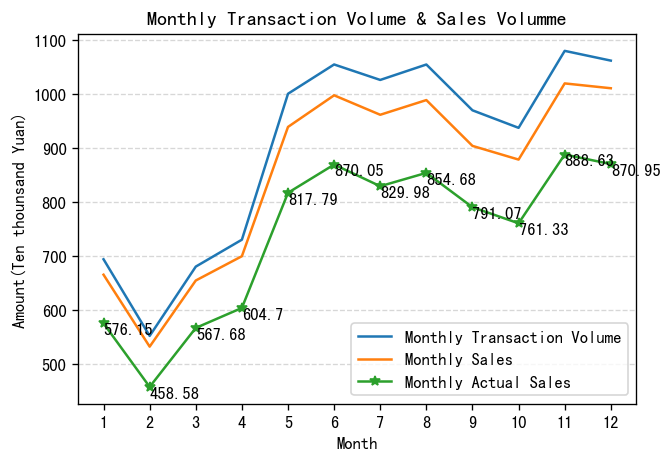

In [94]:
#visualy
plt.figure(figsize=(6, 4), dpi=120) # 加dpi是为了让图像显示更加清楚
gmv_by_month.plot(kind='line', label='Monthly Transaction Volume')
pay_by_month.plot(kind='line', label='Monthly Sales')
real_by_month.plot(kind='line', label='Monthly Actual Sales', marker='*')
plt.title('Monthly Transaction Volume & Sales Volumme')
plt.legend() # 图例
plt.xticks(list(range(1, 13))) # x轴刻度
plt.xlabel('Month') # x轴标注
plt.ylabel('Amount(Ten thounsand Yuan)') # y轴标注
plt.grid(axis='y', linestyle='--', alpha=0.5) # 网格线
for i in range(1, 13):
    plt.text(i, real_by_month[i]-20, np.round(real_by_month[i], 2))
plt.show()


In [95]:
gmv_by_channel = order_df.groupby('channelID').orderAmount.sum()
gmv_by_channel

channelID
渠道-0007    8613932.6100
渠道-0168    4371562.7400
渠道-0191    3378255.1900
渠道-0283    6559076.1400
渠道-0318    3170493.9800
渠道-0330    2182137.8400
渠道-0396    8731850.3700
渠道-0465    4357073.0400
渠道-0530   12753905.8200
渠道-0568    4508418.3000
渠道-0765    9601795.5000
渠道-0789    3282428.5400
渠道-0896   17307338.4600
渠道-0985    6564057.8600
渠道-9527   13113603.3100
Name: orderAmount, dtype: float64

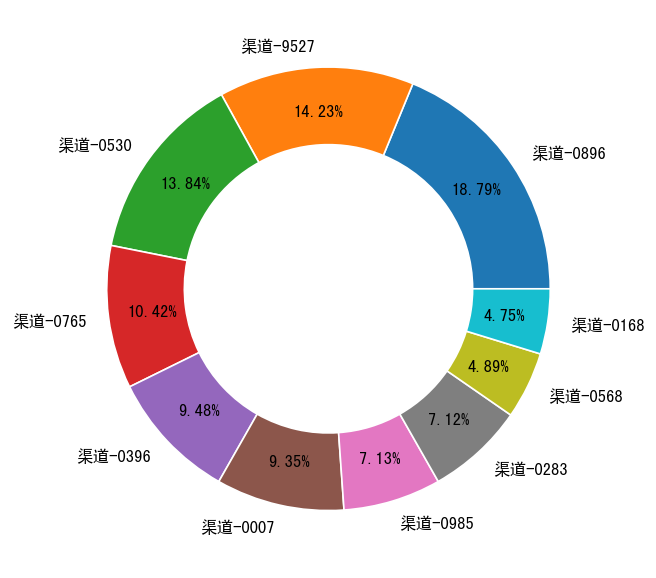

In [96]:
plt.figure(figsize=(6, 6), dpi= 120)
gmv_by_channel.nlargest(10).plot(
    kind='pie',
    autopct='%.2f%%',
    pctdistance=0.8, # 百分比的位置
    wedgeprops= { #环状图
        'width': 0.35,# 掏空的大小
        'linewidth': 1,
        'edgecolor': 'white'
    }
)
plt.ylabel(None)
plt.show()

In [97]:
# 想要统计周几下单最高，需要先加一列星期的列
# 然后根据星期分组，统计一周内的下单量
order_df['weekday'] = order_df.orderTime.dt.weekday
ser = order_df.groupby('weekday').orderID.count()

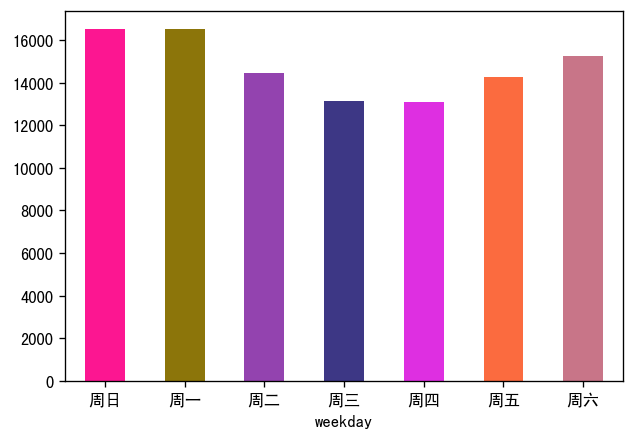

In [98]:
plt.figure(figsize=(6, 4), dpi=120)
# ser.reindex([1, 2, 3, 4, 5, 6, 0])
ser.plot(
    kind='bar',
    color=np.random.rand(7, 3),
)
plt.xticks(ser.index, labels=[f'周{i}' for i in '日一二三四五六'], rotation=0) # 找到位置，标记就行了

plt.show()

In [99]:
# 每天那个时段下单量最高
# 想要统计哪个时段的下单量最高，先要分时段，这里需要做取整操作，将时段分的清楚
# 处理完成之后取time，就只拿到了时间,然后以时间分组
order_df['time'] = order_df.orderTime.dt.floor('30T').dt.time
order_df.head(10)
ser1 = order_df.groupby('time').orderID.count()

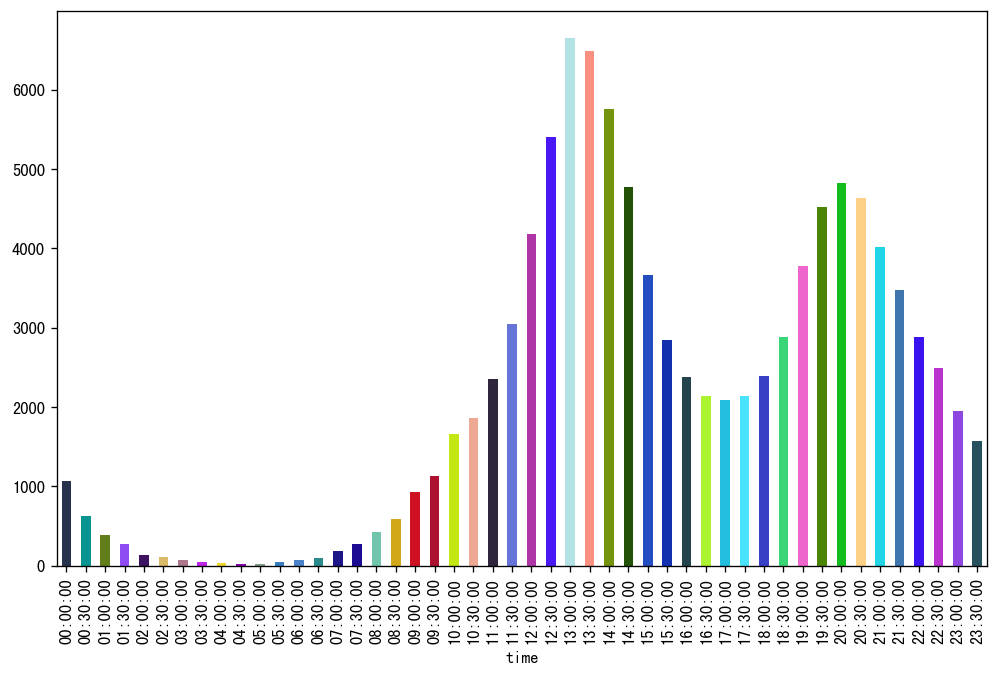

In [100]:
plt.figure(figsize=(10, 6), dpi=120)
ser1.plot(
    kind='bar',
    color=np.random.rand(48, 3)
)
plt.show()

Calculate the repurchase rate of users

In [123]:
temp = pd.pivot_table(data=order_df, index=['userID'], columns='month', values=['orderID'], aggfunc='count')

In [124]:
def handle_data(x):
    return 1 if x > 1 else 0 if x == 1 else np.nan
temp = temp.applymap(handle_data)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78634 entries, user-100000 to user-299995
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (orderID, 1)   6241 non-null   float64
 1   (orderID, 2)   4907 non-null   float64
 2   (orderID, 3)   5796 non-null   float64
 3   (orderID, 4)   6483 non-null   float64
 4   (orderID, 5)   9360 non-null   float64
 5   (orderID, 6)   10347 non-null  float64
 6   (orderID, 7)   9356 non-null   float64
 7   (orderID, 8)   9259 non-null   float64
 8   (orderID, 9)   9141 non-null   float64
 9   (orderID, 10)  8704 non-null   float64
 10  (orderID, 11)  10680 non-null  float64
 11  (orderID, 12)  10365 non-null  float64
dtypes: float64(12)
memory usage: 7.8+ MB


In [125]:
# 复购率
repurchase_rate = temp.sum() / temp.count() * 100
repurchase_rate

         month
orderID  1       1.8266
         2       1.1412
         3       1.7426
         4       2.0207
         5       3.0556
         6       3.0540
         7       2.5224
         8       3.1645
         9       2.4724
         10      2.7918
         11      2.9120
         12      3.0873
dtype: float64

model:
RFM model
R Recency   - The most recent purchase ---> low
F Frequency - The frequency of purchases ---> high
M Monetary  - The amount of money spent ---> high


In [126]:
# 删除退了货的用户
temp_df = order_df.drop(order_df[order_df.chargeback == '是'].index)

In [127]:
temp_df.shape, order_df.shape

((89710, 13), (103321, 13))

In [134]:
# RFM model
temp_df['F'] = 1
res_df = temp_df.pivot_table(index='userID', values=['orderTime', 'F', 'orderAmount'],
                    aggfunc={
                        'orderTime': max,
                        'F': sum,
                        'orderAmount': sum
                    }) # 使用字典代表每个列使用的函数
res_df.shape,res_df.head()

((70592, 3),
              F  orderAmount           orderTime
 userID                                         
 user-100000  1    1978.4700 2019-10-13 18:46:46
 user-100003  1     521.6000 2019-05-24 13:04:05
 user-100006  1     466.8900 2019-11-14 15:37:19
 user-100007  1    2178.2000 2019-01-14 18:45:35
 user-100008  1    4949.6500 2019-11-16 17:15:03)

In [135]:
# 添加R列，统计最近一次购买的相距离本年度最后一天的天数
cur_date = datetime(2019, 12, 31, 23, 59, 59)
res_df['R'] =  (cur_date - res_df['orderTime']).dt.days

In [136]:
res_df['M'] = res_df.orderAmount

In [137]:
# 删除其他列
res_df.drop(['orderAmount', 'orderTime'], axis=1, inplace=True)

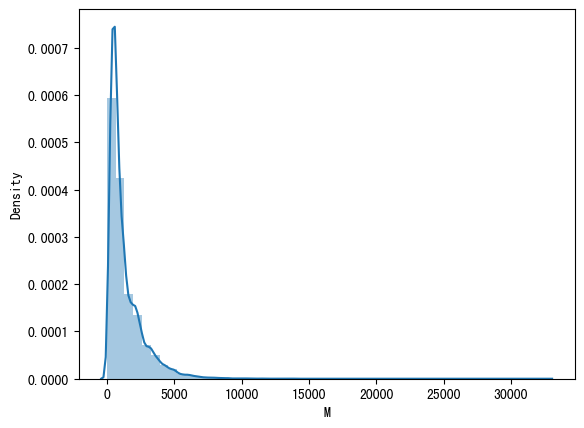

In [138]:
import seaborn as sns
# sns.distplot(res_df.orderAmount)
sns.distplot(res_df.M)
plt.show()

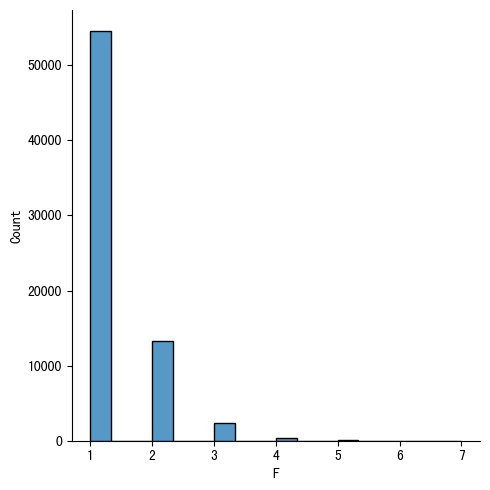

In [139]:
plt.close('all')
sns.displot(res_df.F)
plt.show()

In [140]:
res_df = res_df.reindex(columns=['R', 'F', 'M'])

In [141]:
# 与中位数作差然后将大于中位数的标记为1， 小于的标记为0
temp_df = res_df.apply(lambda x: x-x.mean())
#rmf
rfm_model = temp_df.applymap(lambda x: '1' if x >= 0 else '0')

In [142]:
tags_dict = {
        '111': '重要价值用户',
        '101': '重要发展用户',
        '011': '重要保持用户',
        '001': '重要挽留用户',
        '110': '一般价值用户',
        '100': '一般发展用户',
        '010': '一般保持用户',
        '000': '一般挽留用户',
    }
def make_tag(model):
    key = model['R'] + model['F'] + model['M']
    return tags_dict[key]
rfm_model['label'] = rfm_model.apply(make_tag, axis=1)
rfm_model.rename(columns={'label': 'TAG'}, inplace=True)

In [143]:
ser2 = rfm_model.groupby('TAG').TAG.count()
ser2

TAG
一般价值用户     1373
一般保持用户     3836
一般发展用户    22311
一般挽留用户    19813
重要价值用户     2684
重要保持用户     8062
重要发展用户     6901
重要挽留用户     5612
Name: TAG, dtype: int64

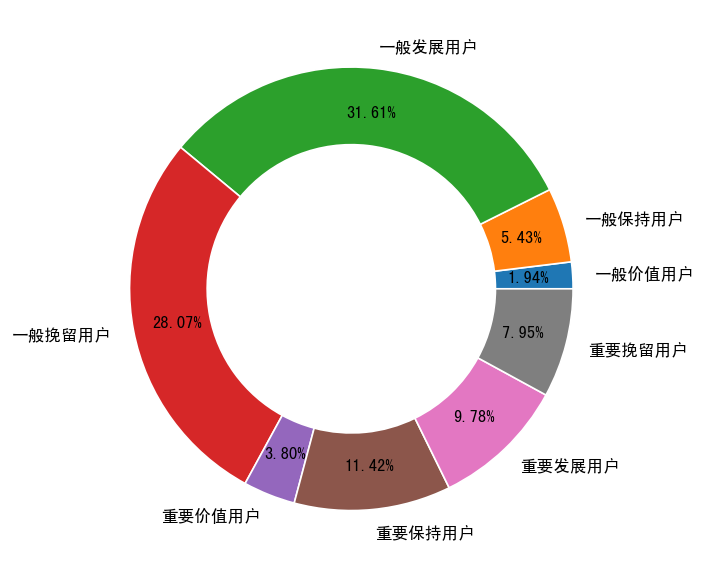

In [144]:
plt.close('all')
plt.figure(figsize=(6, 6), dpi=120)
ser2.plot(
    kind='pie',
    autopct='%.2f%%',
    pctdistance=0.8,
    wedgeprops={
        'width': 0.35,
        'edgecolor':'white',
        'linewidth': 1
    }
)
plt.ylabel('')
plt.show()